# 비디오 게임 판매량 데이터셋을 이용하여 글로벌 판매량(Global_Sales) 예측

### 주요 Feature 설명

Rank - 전체 매출 순위 Ranking of overall sales

Name - 게임 이름 The games name

Platform - 게임 출시 플랫폼 Platform of the games release (i.e. PC,PS4, etc.)

Year - 게임 출시 연도 Year of the game's release

Genre - 게임의 장르 Genre of the game

Publisher - 게임 제작사 Publisher of the game

NA_Sales - 북미 지역 판매량(백만단위) Sales in North America (in millions)

EU_Sales - 유럽 지역 판매량(백만단위) Sales in Europe (in millions)

JP_Sales - 일본 지역 판매량(백만단위) Sales in Japan (in millions)

Other_Sales - 그외 지역 판매량(백만단위)  Sales in the rest of the world (in millions)

Global_Sales - 전 세계 총 판매량(백만단위) Total worldwide sales.

### 0. 데이터 불러오기 및 라이브러리 import

In [1]:
import pandas as pd
df = pd.read_csv('./vgsales.csv')
print(df.shape)
df.head(5)

(16598, 11)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### 1. EDA 및 전처리

1) 결측치 처리

- `Year`과 `Publisher`에서 결측치가 발견
    - 숫자인 `Year`은 0
    - 문자인 `Publisher`는 ''으로 채움

In [2]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [3]:
values = {'Year':0, 'Publisher':''}
df.fillna(value=values, inplace=True)
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

2) 지역에 따라 장르별 판매량의 합을 시각화하여 표현

In [4]:
df2 = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

In [5]:
genre2region = df2.groupby(by = 'Genre').sum()
genre2region

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,877.83,525.00,159.95,187.38
Adventure,105.80,64.13,52.07,16.81
Fighting,223.59,101.32,87.35,36.68
Misc,410.24,215.98,107.76,75.32
Platform,447.05,201.63,130.77,51.59
Puzzle,123.78,50.78,57.31,12.55
Racing,359.42,238.39,56.69,77.27
Role-Playing,327.28,188.06,352.31,59.61
Shooter,582.60,313.27,38.28,102.69


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]

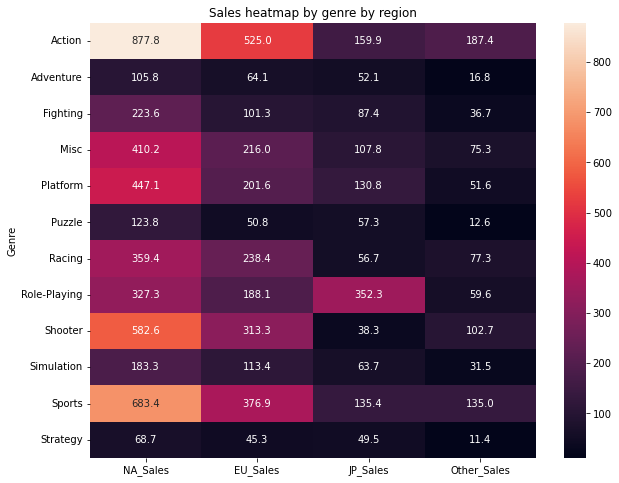

In [7]:
sns.heatmap(genre2region, annot=True, fmt = ".1f")
plt.title('Sales heatmap by genre by region')
plt.show()

In [8]:
# 아래와 같이 시각화해주세요!

### 2. 통계분석(1)

판매 지역(NA, EU, JP, Other)에 따라 판매량에 차이가 있는지 검정

- Sale_Area 변수는 비디오 게임 판매 지역, Sales는 판매량을 의미하게 데이터프레임 변형

- 판매 지역(Sale_Area 변수)에 따라 판매량(Sales)의 평균에 유의미한 차이가 존재하는지 일원배치 분산분석을 수행하고, 그 결과를 해석해라. [ 유의수준 0.05 기준 ]

In [48]:
df3 = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df3

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,41.49,29.02,3.77,8.46
1,29.08,3.58,6.81,0.77
2,15.85,12.88,3.79,3.31
3,15.75,11.01,3.28,2.96
4,11.27,8.89,10.22,1.00
...,...,...,...,...
16593,0.01,0.00,0.00,0.00
16594,0.01,0.00,0.00,0.00
16595,0.00,0.00,0.00,0.00
16596,0.00,0.01,0.00,0.00


In [49]:
area2sales_dict = {'Sale_Area':[], 'Sales':[], 'type':[]}
type = 0
for col in df3.columns:
    for value in df3[col]:
        area2sales_dict['Sale_Area'].append(col)
        area2sales_dict['Sales'].append(value)
        area2sales_dict['type'].append(type)
    type += 1
area2sales_df = pd.DataFrame(area2sales_dict)
area2sales_df

,Sale_Area,Sales,type
0,NA_Sales,41.49,0
1,NA_Sales,29.08,0
2,NA_Sales,15.85,0
3,NA_Sales,15.75,0
4,NA_Sales,11.27,0
...,...,...,...
66387,Other_Sales,0.00,3
66388,Other_Sales,0.00,3
66389,Other_Sales,0.00,3
66390,Other_Sales,0.00,3


In [52]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


model = ols('type ~ C(Sales)', area2sales_df).fit()
res = anova_lm(model)
print(res)

# 귀무가설 : 판매 지역간 Sales 차이는 없다
# p-value가 유의수준 5% 이하이므로 귀무가설 기각, 대립가설 지지

               df        sum_sq    mean_sq          F  PR(>F)
C(Sales)    494.0  10547.564068  21.351344  19.422173     0.0
Residual  65897.0  72442.435932   1.099328        NaN     NaN


### 3. 통계분석(2)

플랫폼(Platform 변수)과 장르(Genre 변수)의 독립성 검정

- 전체 판매량은 Global_Sales 변수 사용

- 플랫폼(Platform 변수)과 장르(Genre 변수)가 서로 독립인지 확인하기 위해 분할표를 생성하고, 가설에 따른 검정을 수행하고 그 결과를 해석해라 [ 유의수준 0.05 기준 ]

In [2]:
df4 = df[['Genre', 'Platform', 'Global_Sales']]
df4

,Genre,Platform,Global_Sales
0,Sports,Wii,82.74
1,Platform,NES,40.24
2,Racing,Wii,35.82
3,Sports,Wii,33.00
4,Role-Playing,GB,31.37
...,...,...,...
16593,Platform,GBA,0.01
16594,Shooter,GC,0.01
16595,Racing,PS2,0.01
16596,Puzzle,DS,0.01


In [8]:
tmp = df4.groupby(by = ['Genre', 'Platform']).sum()

In [37]:
platform2genre = pd.DataFrame(columns=df4.Platform.unique(), index=df4.Genre.unique())
platform2genre

,Wii,NES,GB,DS,X360,PS3,PS2,SNES,GBA,3DS,...,DC,PSV,SAT,SCD,WS,NG,TG16,3DO,GG,PCFX
Sports,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Platform,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Racing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Role-Playing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Puzzle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Misc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Shooter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Simulation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fighting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
for i in range(tmp.size):
    g, p = tmp.index[i]
    sale = tmp.iloc[i].Global_Sales
    platform2genre[p][g] = sale
platform2genre.fillna(0, inplace=True)
platform2genre

,Wii,NES,GB,DS,X360,PS3,PS2,SNES,GBA,3DS,...,DC,PSV,SAT,SCD,WS,NG,TG16,3DO,GG,PCFX
Sports,292.06,26.85,9.05,31.83,139.12,135.56,273.41,17.87,16.41,6.20,...,3.66,4.88,2.79,0.00,0.00,0.02,0.00,0.00,0.00,0.00
Platform,90.74,95.78,54.91,77.45,11.39,30.33,72.51,65.65,78.30,32.23,...,2.54,3.03,0.76,1.50,0.00,0.00,0.00,0.00,0.04,0.00
Racing,61.28,9.78,4.55,38.64,65.99,73.95,156.28,13.49,18.80,14.49,...,2.65,2.95,2.40,0.07,0.00,0.00,0.00,0.00,0.00,0.00
Role-Playing,14.06,18.78,88.24,126.85,71.98,75.30,93.50,36.43,64.21,75.74,...,0.68,13.39,3.76,0.06,1.22,0.00,0.00,0.00,0.00,0.03
Puzzle,15.67,21.00,47.47,84.29,0.85,0.60,5.90,6.38,12.92,5.57,...,0.00,0.20,1.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00
Misc,221.06,3.59,13.35,137.76,91.96,47.85,101.14,5.02,36.25,10.48,...,0.00,5.18,1.20,0.10,0.00,0.00,0.00,0.00,0.00,0.00
Shooter,28.77,35.62,1.20,8.20,278.55,196.04,108.57,6.07,3.60,1.29,...,0.33,4.57,3.98,0.00,0.00,0.00,0.02,0.00,0.00,0.00
Simulation,36.97,0.00,3.55,132.03,14.45,10.79,42.66,5.63,5.91,27.08,...,0.52,0.08,1.13,0.00,0.00,0.00,0.00,0.02,0.00,0.00
Action,118.58,28.75,7.92,115.56,242.67,307.88,272.76,10.08,55.76,57.02,...,1.26,20.01,0.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Fighting,23.86,6.54,0.00,7.20,37.64,51.70,92.60,26.95,4.21,10.46,...,1.83,3.15,8.52,0.00,0.00,1.42,0.00,0.00,0.00,0.00


In [57]:
import scipy.stats

chi2, pvalue, dof, expected = scipy.stats.chi2_contingency(platform2genre)
print(chi2)
print(pvalue)
print(dof)

# 귀무가설 : 두 feature는 독립이다
# pvalue가 유의수준 5% 이하이므로 귀무가설 기각, 대립가설 지지

5153.418136100419
0.0
330


### 4. 모델링 및 예측

- 3가지 모델을 선택하여 모델링하고, 모델을 선택한 이유를 서술
- 3가지 성능지표로 모델을 측정하고, 지표를 선택한 이유를 서술